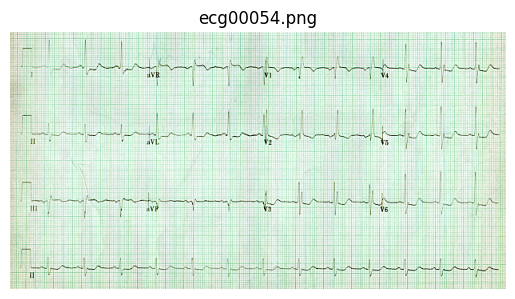

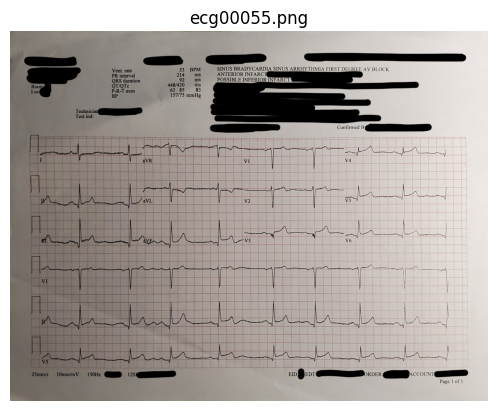

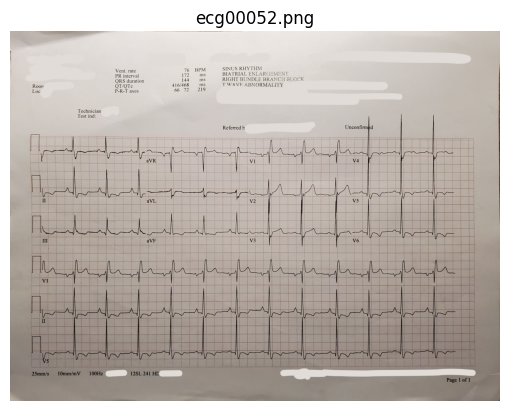

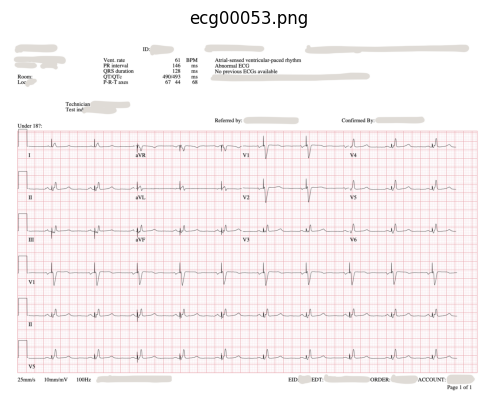

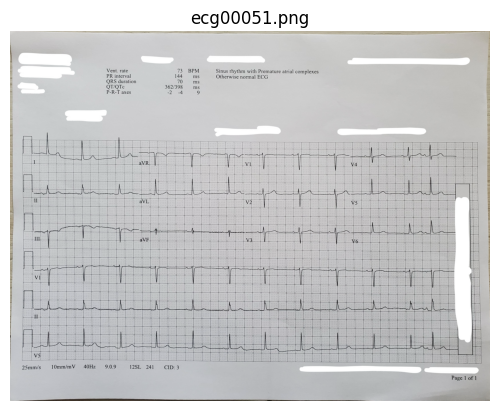

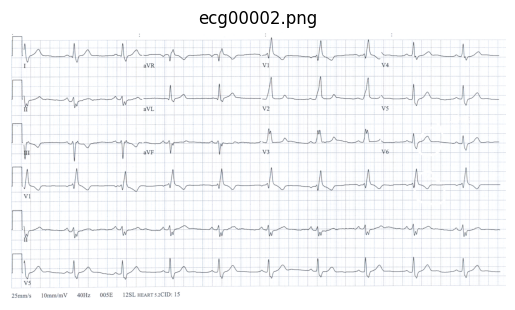

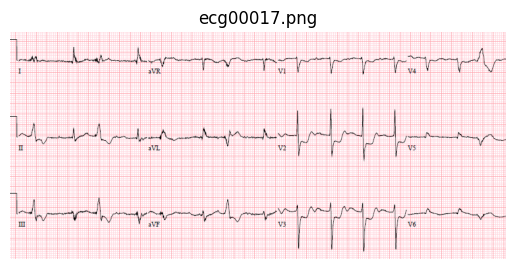

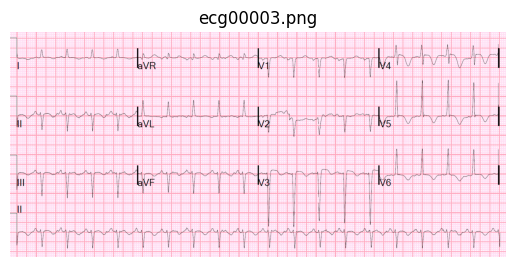

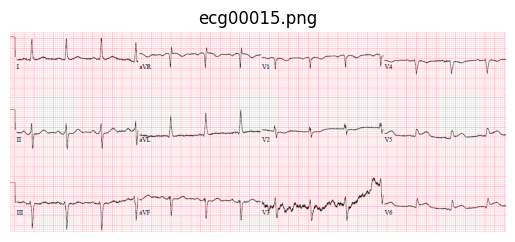

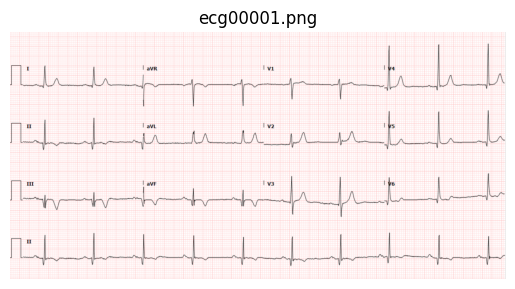

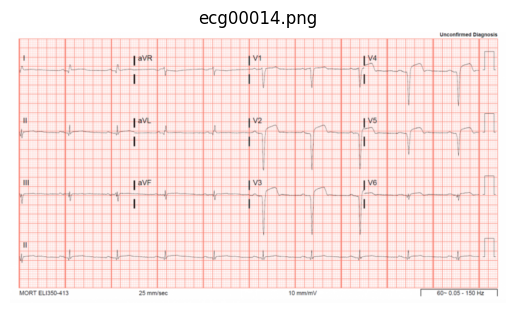

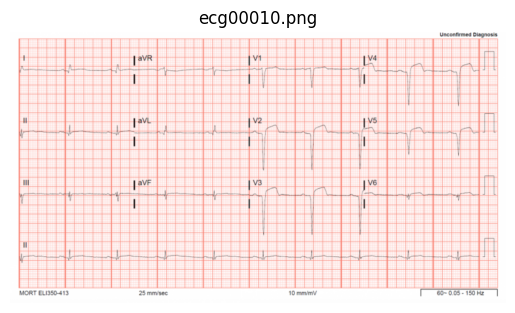

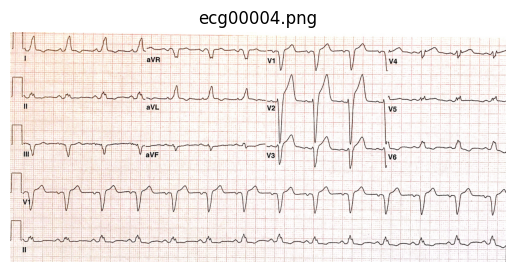

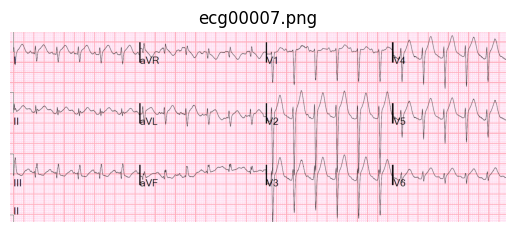

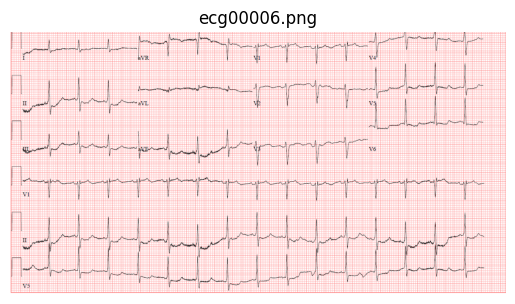

In [27]:
#loading the function
import os
from PIL import Image
import matplotlib.pyplot as plt

# Folder path where PNG images are located
folder_path = '/Users/allwindenny/Downloads/ecg-image-kit-main/sample-data/ecg-images'

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Load and display each image
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image using PIL
    img = Image.open(image_path)
    
    # Display the image using matplotlib
    plt.imshow(img)
    plt.title(image_file)  # Optional: Display the filename as the title
    plt.axis('off')  # Optional: Remove the axis for a cleaner look
    plt.show()


In [3]:
#pip install --upgrade matplotlib pillow

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/28/ba/8be09886eb56ac04a218a1dc3fa728a5c4cac60b019b4f1687885166da00/matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/25/b3/2b54a1d541accebe6bd8b1358b34ceb2c509f51cb7dcda8687362490da5b/pillow-11.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 6.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.2
    Uninstalling matplotlib-3.7.2:
      Successfully uninstalled matplotlib-3.7.2
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#installing tensor flow
#!pip install tensorflow


In [3]:
#import tensorflow

In [ ]:
#conda install numpy=1.24.3

libpng warning: iCCP: known incorrect sRGB profile


Epoch 1/10


/Users/allwindenny/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9644 - loss: 0.3573 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 1.0000 - loss: 4.6725e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 0.

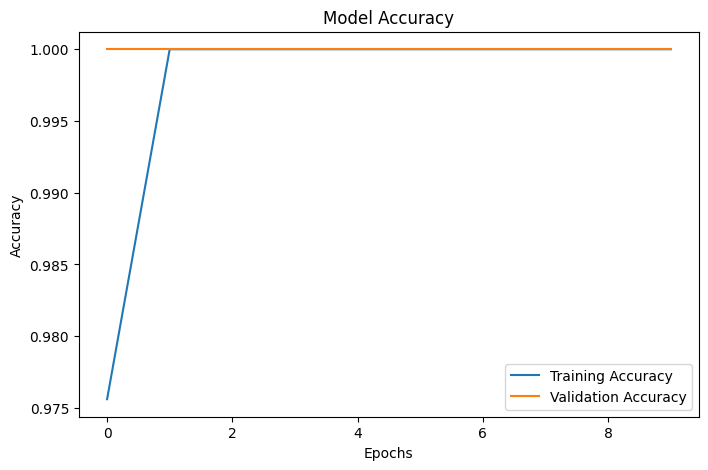

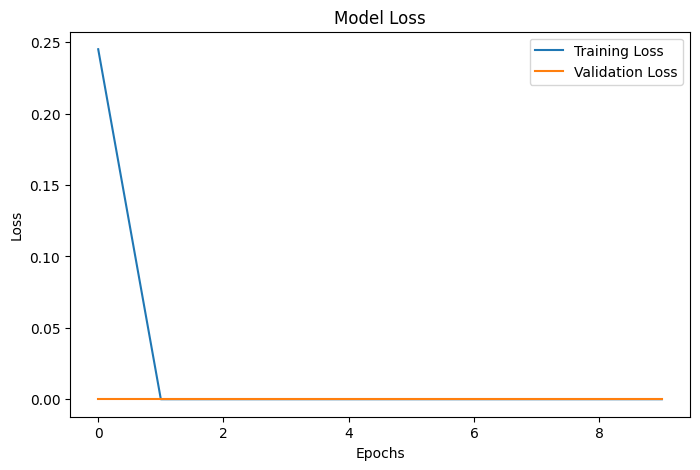

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

In [56]:
# here I tried to labell the dataset based on characteristics of the T-wave or other features relevant to ECG images
#For ECG images, abnormal images could represent scenarios like inverted T-waves, peaked T-waves, or irregular shapes, while normal images would exhibit typical T-wave morphology.
# here but machine tries to label the image as either all of them as normal or abnormal image (which is wrong, even I tried to chnage the labelling parameter) so these show unrealibilty of the data
'''
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define paths
data_dir = '/Users/allwindenny/Downloads/ecg-image-kit-main/sample-data/ecg-images'
img_size = (128, 128)

# Preprocessing: Load and preprocess images
def preprocess_images(data_dir, img_size):
    images = []
    filenames = []
    for file in os.listdir(data_dir):
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Check for valid image file extensions
            img_path = os.path.join(data_dir, file)
            
            # Load the image in grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # Resize the image to the desired dimensions (img_size) and normalize pixel values
            img = cv2.resize(img, img_size) / 255.0  # Pixel values normalized between 0 and 1
            
            images.append(img)  # Append processed image to the list
            filenames.append(file)  # Store the filename for reference
    return np.array(images), filenames

# Feature extraction and improved labeling logic
def label_images_based_on_features(images, filenames):
    labels = []
    labeled_images = []
    
    # Define criteria for classification based on T-wave morphology
    for i, img in enumerate(images):
        # Approximate the T wave region (middle region of the image)
        t_wave_region = img[int(img.shape[0] * 0.4):int(img.shape[0] * 0.6), :]
        
        # Calculate properties of the T wave region
        mean_intensity = np.mean(t_wave_region)
        max_intensity = np.max(t_wave_region)
        std_dev = np.std(t_wave_region)
        
        # Define thresholds for normal vs abnormal based on intensity and standard deviation
        mean_threshold = np.mean(img) + 0.5 * np.std(img)  # Dynamic threshold for mean intensity
        max_threshold = 0.8  # Threshold for maximum intensity (peak detection)
        std_dev_threshold = 0.2  # Threshold for standard deviation (sharpness of the wave)
        
        # Label the image based on the refined criteria
        if mean_intensity < mean_threshold or max_intensity > max_threshold or std_dev > std_dev_threshold:
            labels.append(1)  # 1 = Abnormal (e.g., Inverted, Peaked, or Irregular T waves)
        else:
            labels.append(0)  # 0 = Normal (Typical T wave shape and intensity)
        
        # Annotate the image for visualization
        labeled_img = img.copy()
        label_text = 'Normal' if labels[-1] == 0 else 'Abnormal'
        cv2.putText(labeled_img, label_text, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)
        labeled_images.append(labeled_img)
    
    return np.array(labels), labeled_images

# Load and preprocess images
images, filenames = preprocess_images(data_dir, img_size)

# Label the data based on refined criteria (Normal or Abnormal)
labels, labeled_images = label_images_based_on_features(images, filenames)

# Reshape images and convert labels to categorical
images = images.reshape(-1, img_size[0], img_size[1], 1)
labels = to_categorical(labels, 2)  # 2 classes: Normal and Abnormal

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Output layer with 2 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on validation data
predictions = model.predict(X_val)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_val, axis=1)

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=['Normal', 'Abnormal'])
print("Classification Report:\n", report)

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Abnormal'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Visualization of labeled images and predictions
for i in range(10):  # Display first 10 images from validation set
    plt.figure(figsize=(5, 3))
    plt.imshow(X_val[i].reshape(img_size[0], img_size[1]), cmap='gray')
    plt.title(f"True: {'Normal' if true_classes[i] == 0 else 'Abnormal'} | Predicted: {'Normal' if predicted_classes[i] == 0 else 'Abnormal'}")
    plt.axis('off')
    plt.show()

'''

libpng warning: iCCP: known incorrect sRGB profile


Epoch 1/10


/Users/allwindenny/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 1.0000 - loss: 0.3189 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 1.0000 - loss: 0

/Users/allwindenny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/Users/allwindenny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


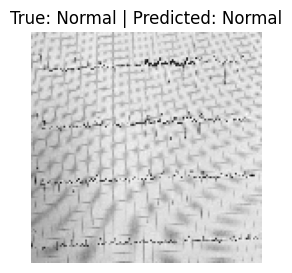

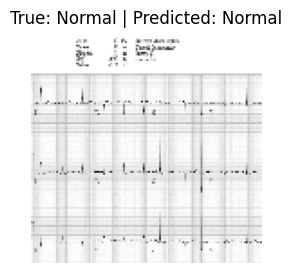

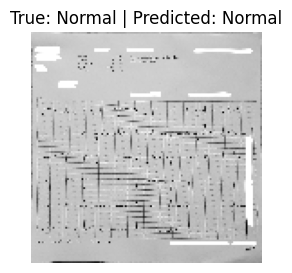

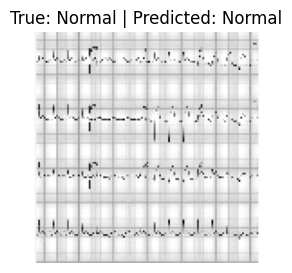

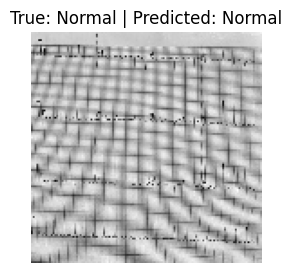

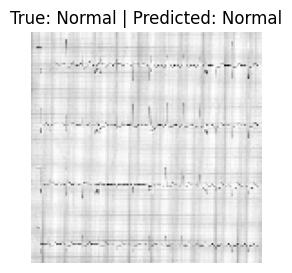

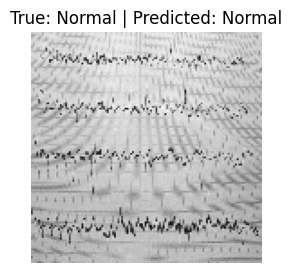

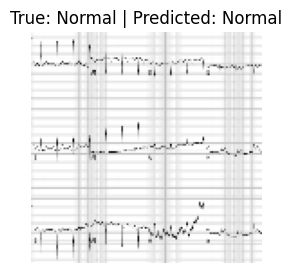

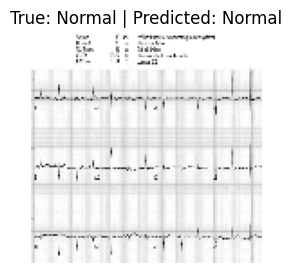

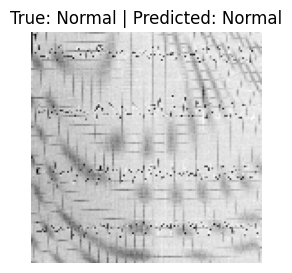

In [61]:
'''import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define paths
data_dir = '/Users/allwindenny/Downloads/ecg-image-kit-main/sample-data/ecg-images'
img_size = (128, 128)

# Preprocessing: Load and preprocess images
def preprocess_images(data_dir, img_size):
    images = []
    filenames = []
    for file in os.listdir(data_dir):
        if file.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(data_dir, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size) / 255.0  # Normalize pixel values
            images.append(img)
            filenames.append(file)
    return np.array(images), filenames

# Feature extraction: New T wave labeling based on simplified criteria (Normal vs Abnormal)
def label_images_based_on_t_wave(images, filenames):
    labels = []
    labeled_images = []
    for i, img in enumerate(images):
        # Approximate the T wave region
        t_wave_region = img[int(img.shape[0] * 0.4):int(img.shape[0] * 0.6), :]
        
        # Calculate different properties (mean, std deviation, etc.)
        mean_intensity = np.mean(t_wave_region)
        std_intensity = np.std(t_wave_region)
        
        # Label based on simplified criteria: 
        # Normal (0) or Abnormal (1) 
        if mean_intensity > 0.3:  # Normal T-wave if mean intensity is above a threshold
            labels.append(0)  # Normal
        else:
            labels.append(1)  # Abnormal
        
        # Annotate the image for visualization
        labeled_img = img.copy()
        label_text = 'Normal' if labels[-1] == 0 else 'Abnormal'
        cv2.putText(labeled_img, label_text, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)
        labeled_images.append(labeled_img)
    return np.array(labels), labeled_images

# Load and preprocess images
images, filenames = preprocess_images(data_dir, img_size)

# Label the data based on T wave morphology
labels, labeled_images = label_images_based_on_t_wave(images, filenames)

# Reshape images and convert labels to categorical (2 classes: Normal, Abnormal)
images = images.reshape(-1, img_size[0], img_size[1], 1)
labels = to_categorical(labels, 2)  # 2 classes: Normal, Abnormal

# Split the data into training and validation sets using stratified sampling for balanced classes
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Output layer with 2 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Generate predictions for the training data and validation data
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

# Convert predictions to class labels
train_predicted_classes = np.argmax(train_predictions, axis=1)
val_predicted_classes = np.argmax(val_predictions, axis=1)

# Convert true labels to class labels
train_true_classes = np.argmax(y_train, axis=1)
val_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrices
train_conf_matrix = confusion_matrix(train_true_classes, train_predicted_classes)
val_conf_matrix = confusion_matrix(val_true_classes, val_predicted_classes)

# Show confusion matrix values (optional, for understanding)
print("Confusion Matrix - Training Data")
print(train_conf_matrix)
print("Confusion Matrix - Validation Data")
print(val_conf_matrix)

# Visualize validation images and display actual and predicted labels above the images
for i in range(10):  # Display first 10 images from validation set
    plt.figure(figsize=(5, 3))
    plt.imshow(X_val[i].reshape(img_size[0], img_size[1]), cmap='gray')
    true_label = 'Normal' if val_true_classes[i] == 0 else 'Abnormal'
    predicted_label = 'Normal' if val_predicted_classes[i] == 0 else 'Abnormal'
    
    # Display labels on top of the image
    plt.title(f"True: {true_label} | Predicted: {predicted_label}")
    plt.axis('off')  # Turn off axis
    plt.show()'''


In [62]:
# So as next approach I will manually create two folders under the  data stored path and manually labell the image
'''import os

# Define the main directory
main_dir = '/Users/allwindenny/Downloads/ecg-image-kit-main/sample-data/ecg-images'

# Define the folder names
folders = ["Training data", "Test data"]

# Create the folders inside the main directory
for folder in folders:
    folder_path = os.path.join(main_dir, folder)
    try:
        # Create the folder if it doesn't already exist
        os.makedirs(folder_path, exist_ok=True)
        print(f"Folder created: {folder_path}")
    except Exception as e:
        print(f"Error creating folder {folder_path}: {e}")
'''

Folder created: /Users/allwindenny/Downloads/ecg-image-kit-main/sample-data/ecg-images/Training data
Folder created: /Users/allwindenny/Downloads/ecg-image-kit-main/sample-data/ecg-images/Test data


In [63]:
#manually labelling done from my end
'''
import os
import cv2
import shutil

# Define paths
source_dir = '/Users/allwindenny/Downloads/ecg-image-kit-main/sample-data/ecg-images'
train_normal_dir = os.path.join(source_dir, 'Training data', 'Normal')
train_abnormal_dir = os.path.join(source_dir, 'Training data', 'Abnormal')
test_normal_dir = os.path.join(source_dir, 'Test data', 'Normal')
test_abnormal_dir = os.path.join(source_dir, 'Test data', 'Abnormal')

# Create directories if they don't exist
for dir_path in [train_normal_dir, train_abnormal_dir, test_normal_dir, test_abnormal_dir]:
    os.makedirs(dir_path, exist_ok=True)

# List all images in the source directory
images = [f for f in os.listdir(source_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

for i, img_name in enumerate(images):
    img_path = os.path.join(source_dir, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Display the image
    cv2.imshow(f"Image {i + 1}/{len(images)}: {img_name}", img)
    print(f"Image {i + 1}/{len(images)}: {img_name}")
    
    # Wait for a key press
    key = cv2.waitKey(0) & 0xFF
    
    # Label based on key press
    if key == ord('n'):  # Press 'n' for Normal
        shutil.move(img_path, train_normal_dir)
        print(f"Labeled as Normal (Training).")
    elif key == ord('a'):  # Press 'a' for Abnormal
        shutil.move(img_path, train_abnormal_dir)
        print(f"Labeled as Abnormal (Training).")
    elif key == ord('N'):  # Press 'Shift+N' for Normal (Test)
        shutil.move(img_path, test_normal_dir)
        print(f"Labeled as Normal (Test).")
    elif key == ord('A'):  # Press 'Shift+A' for Abnormal (Test)
        shutil.move(img_path, test_abnormal_dir)
        print(f"Labeled as Abnormal (Test).")
    elif key == ord('q'):  # Press 'q' to quit
        print("Exiting labeling process.")
        break
    else:
        print("Invalid key pressed. Skipping.")
    
    # Close the displayed image
    cv2.destroyAllWindows()
'''

Image 1/52: ecg00037.jpg
Labeled as Normal (Training).
Image 2/52: ecg00023.jpg
Labeled as Normal (Training).
Image 3/52: ecg00036.jpg
Labeled as Abnormal (Training).
Image 4/52: ecg00008.jpg
Labeled as Normal (Training).
Image 5/52: ecg00020.jpg
Labeled as Abnormal (Training).
Image 6/52: ecg00034.jpg
Labeled as Normal (Training).
Image 7/52: ecg00035.jpg
Labeled as Normal (Training).
Image 8/52: ecg00025.jpg
Labeled as Normal (Training).
Image 9/52: ecg00031.jpg
Labeled as Normal (Training).
Image 10/52: ecg00009.jpeg
Labeled as Abnormal (Training).
Image 11/52: ecg00018.jpg
Labeled as Abnormal (Training).
Image 12/52: ecg00030.jpg
Labeled as Abnormal (Training).
Image 13/52: ecg00024.jpg
Labeled as Normal (Training).
Image 14/52: ecg00032.jpg
Labeled as Normal (Training).
Image 15/52: ecg00026.jpg
Labeled as Normal (Training).
Image 16/52: ecg00027.jpg
Labeled as Normal (Test).
Image 17/52: ecg00033.jpg
Labeled as Normal (Test).
Image 18/52: ecg00040.jpg
Labeled as Abnormal (Test).


libpng warning: iCCP: known incorrect sRGB profile


Labeled as Normal (Training).
Image 20/52: ecg00055.png
Labeled as Normal (Training).
Image 21/52: ecg00041.jpg
Labeled as Abnormal (Test).
Image 22/52: ecg00043.jpg
Labeled as Normal (Training).
Image 23/52: ecg00042.jpg
Labeled as Normal (Training).
Image 24/52: ecg00046.jpg
Labeled as Normal (Training).
Image 25/52: ecg00052.png
Labeled as Abnormal (Test).
Image 26/52: ecg00053.png
Labeled as Normal (Training).
Image 27/52: ecg00047.jpg
Labeled as Abnormal (Training).
Image 28/52: ecg00045.jpg
Labeled as Normal (Training).
Image 29/52: ecg00051.png
Labeled as Normal (Training).
Image 30/52: ecg00044.jpg
Labeled as Normal (Training).
Image 31/52: ecg00050.jpg
Labeled as Abnormal (Test).
Image 32/52: ecg00049.jpg
Labeled as Abnormal (Test).
Image 33/52: ecg00048.jpg
Labeled as Normal (Training).
Image 34/52: ecg00016.jpg
Labeled as Normal (Training).
Image 35/52: ecg00002.png
Labeled as Normal (Training).
Image 36/52: ecg00017.png
Labeled as Abnormal (Test).
Image 37/52: ecg00003.png


/Users/allwindenny/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Found 42 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


/Users/allwindenny/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/allwindenny/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 711ms/step - accuracy: 0.7705 - loss: 0.9534 - val_accuracy: 0.2000 - val_loss: 0.8135
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


2024-11-29 10:16:15.102916: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/allwindenny/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-11-29 10:16:15.108540: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 814ms/step - accuracy: 0.7556 - loss: 0.6238 - val_accuracy: 0.2000 - val_loss: 0.8671
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10


2024-11-29 10:16:17.002855: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 773ms/step - accuracy: 0.6708 - loss: 0.6702 - val_accuracy: 0.2000 - val_loss: 0.9278
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 809ms/step - accuracy: 0.6956 - loss: 0.6318 - val_accuracy: 0.2000 - val_loss: 1.2102
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10


2024-11-29 10:16:20.676090: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 632ms/step - accuracy: 0.7495 - loss: 0.6063 - val_accuracy: 0.2000 - val_loss: 1.0247
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.2000 - loss: 1.0247
Test Accuracy: 20.00%


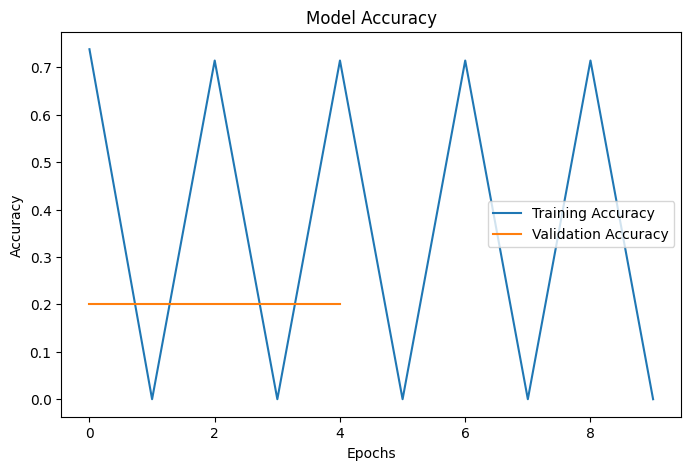

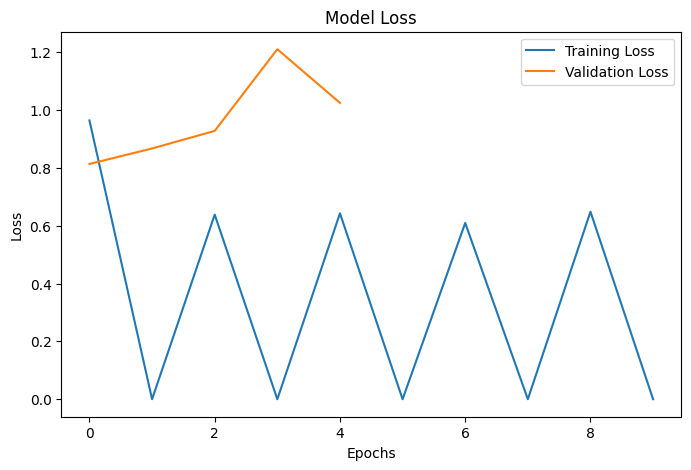

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00         8
      Normal       0.20      1.00      0.33         2

    accuracy                           0.20        10
   macro avg       0.10      0.50      0.17        10
weighted avg       0.04      0.20      0.07        10



/Users/allwindenny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/allwindenny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/allwindenny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

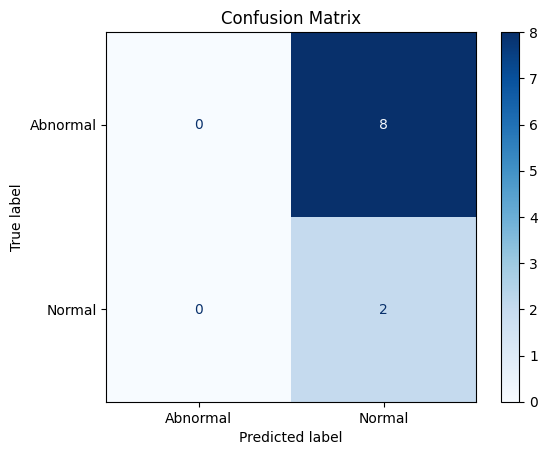

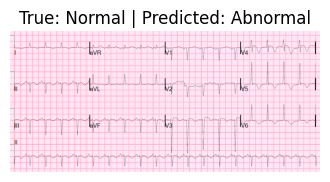

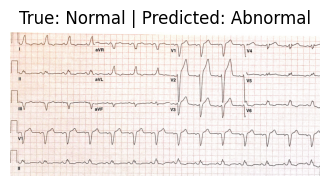

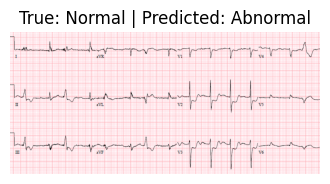

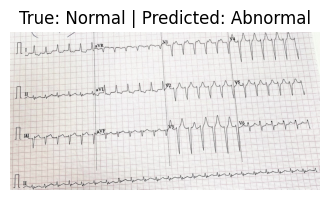

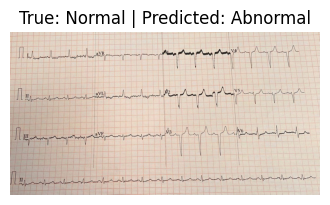

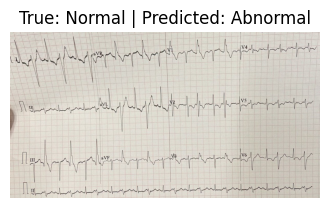

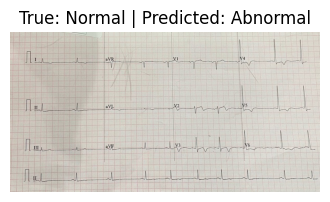

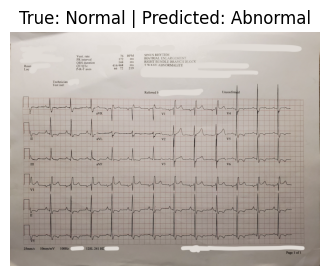

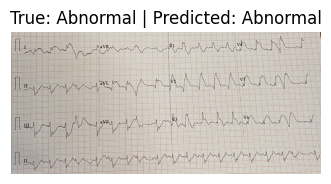

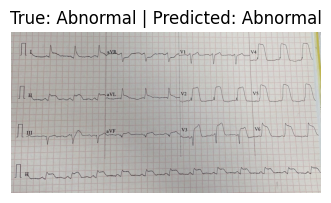

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Paths to training and test data
base_dir = '/Users/allwindenny/Downloads/ecg-image-kit-main/sample-data/ecg-images'
train_dir = os.path.join(base_dir, 'Training data')
test_dir = os.path.join(base_dir, 'Test data')

# Image size and parameters
img_size = (128, 128)
batch_size = 16

# Data generators for loading and augmenting data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=False  # Important for consistent evaluation
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Normal/Abnormal)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions on test data
predictions = (model.predict(test_generator) > 0.5).astype(int).flatten()
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
report = classification_report(true_labels, predictions, target_names=class_labels)
print("Classification Report:\n", report)

# Confusion matrix
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Display predictions for test data
for i in range(len(test_generator.filenames)):
    img_path = os.path.join(test_dir, test_generator.filenames[i])
    img = plt.imread(img_path)
    predicted_class = 'Normal' if predictions[i] == 0 else 'Abnormal'
    true_class = 'Normal' if true_labels[i] == 0 else 'Abnormal'
    
    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_class} | Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()


Found 42 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7000 - loss: 0.7353 - val_accuracy: 0.8000 - val_loss: 0.4795
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step - accuracy: 0.4688 - loss: 13.8873 - val_accuracy: 0.2000 - val_loss: 0.9396
Epoch 3/10


/Users/allwindenny/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 0.9396
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7188 - loss: 10.3846 - val_accuracy: 0.2000 - val_loss: 0.8211
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step - accuracy: 0.8000 - loss: 1.5550 - val_accuracy: 0.2000 - val_loss: 0.7986
Epoch 6/10


2024-11-29 10:29:38.091867: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 0.7986
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step - accuracy: 0.7000 - loss: 6.0822 - val_accuracy: 0.2000 - val_loss: 0.8187
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5625 - loss: 6.5255 - val_accuracy: 0.8000 - val_loss: 0.6792
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8000 - val_loss: 0.6792
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7188 - loss: 2.6599 - val_accuracy: 0.8000 - val_loss: 0.6104
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.8000 - loss: 0.6104
Test Accuracy: 80.00%


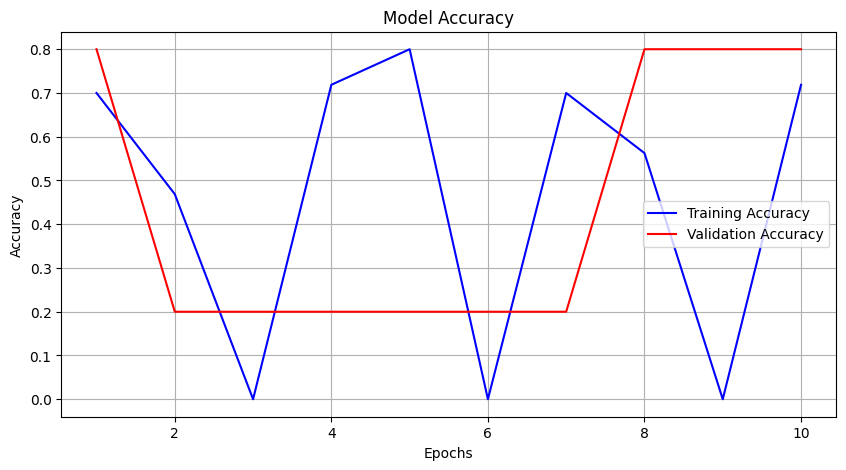

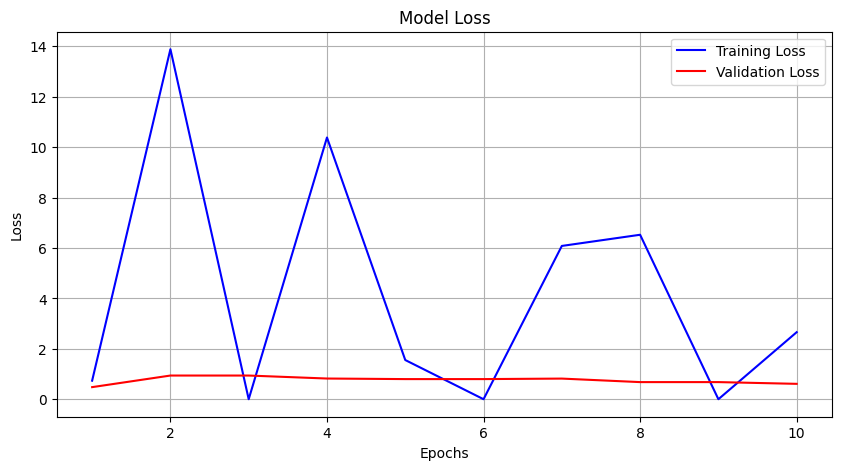

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.88      0.88      0.88         8
      Normal       0.50      0.50      0.50         2

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10



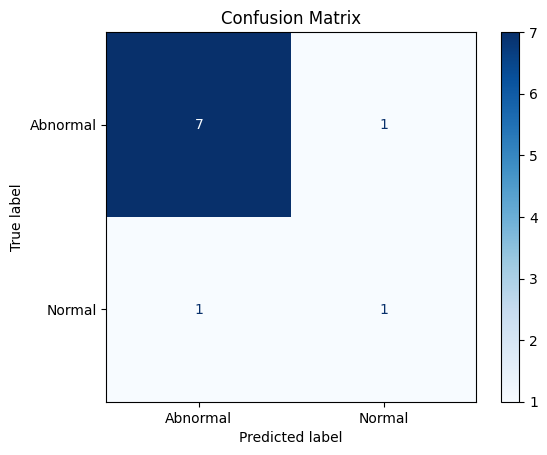

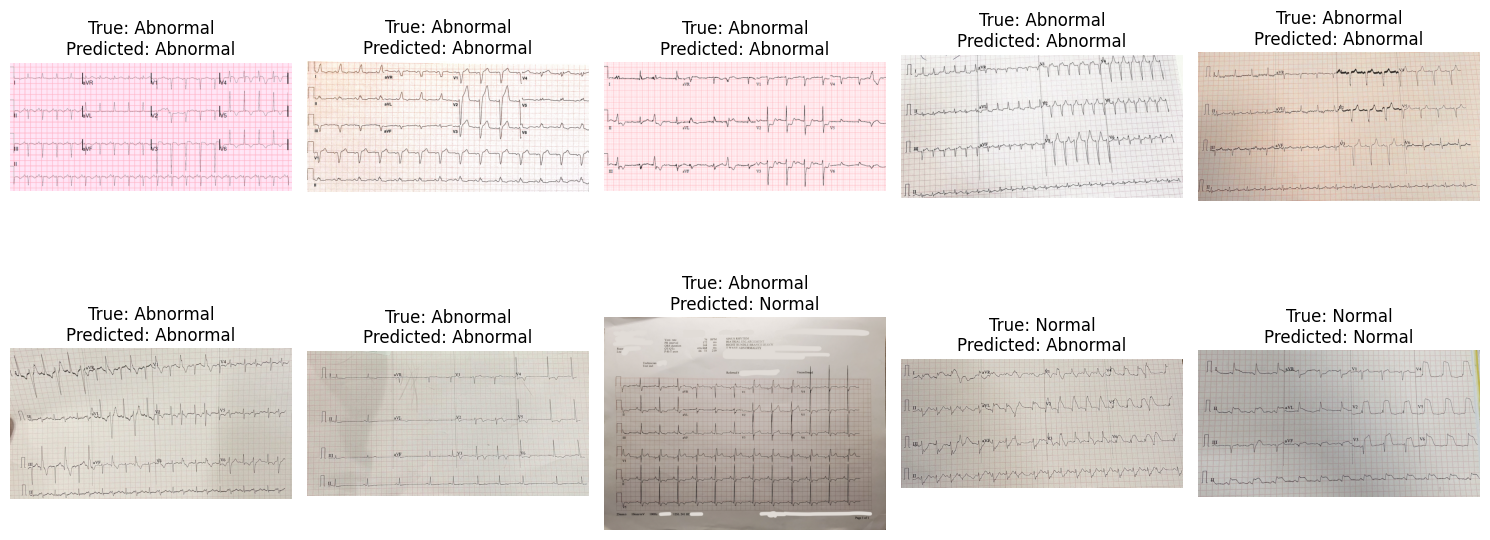

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

# Paths to training and test data
base_dir = '/Users/allwindenny/Downloads/ecg-image-kit-main/sample-data/ecg-images'
train_dir = os.path.join(base_dir, 'Training data')
test_dir = os.path.join(base_dir, 'Test data')

# Image size and parameters
img_size = (128, 128)
batch_size = 32  # Increased for better GPU utilization

# Data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Simple rescaling for test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=False
)

# Efficient CNN Model with Batch Normalization and Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Reduce overfitting
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with optimized settings
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot accuracy and loss
def plot_metrics(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

plot_metrics(history)

# Predictions on test data
predictions = (model.predict(test_generator) > 0.5).astype(int).flatten()
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report and confusion matrix
report = classification_report(true_labels, predictions, target_names=class_labels)
print("Classification Report:\n", report)

cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Visualize test data predictions
def visualize_predictions(generator, predictions, true_labels, class_labels, img_size, num_samples=10):
    filenames = generator.filenames
    plt.figure(figsize=(15, 15))

    for i in range(num_samples):
        img_path = os.path.join(test_dir, filenames[i])
        img = plt.imread(img_path)
        predicted_class = class_labels[int(predictions[i])]
        true_class = class_labels[int(true_labels[i])]

        plt.subplot(5, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_class}\nPredicted: {predicted_class}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

visualize_predictions(test_generator, predictions, true_labels, class_labels, img_size)



Found 42 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


/Users/allwindenny/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/allwindenny/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


2024-11-29 10:21:58.096552: W tensorflow/core/framework/op_kernel.cc:1829] INVALID_ARGUMENT: TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32, tf.float32), but the yielded element was (array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        ...,

        [[0.89019614],
         [0.89019614],
         [0.89019614],
         ...,
         [0.8492146 ],
         [0.88261455],
         [0.8858364 ]],

        [[0.89019614],
         [0.89019614],
         [0.89019614],
         ...,
         [0.893

InvalidArgumentError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32, tf.float32), but the yielded element was (array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        ...,

        [[0.89019614],
         [0.89019614],
         [0.89019614],
         ...,
         [0.8492146 ],
         [0.88261455],
         [0.8858364 ]],

        [[0.89019614],
         [0.89019614],
         [0.89019614],
         ...,
         [0.8934097 ],
         [0.9666983 ],
         [0.95798755]],

        [[0.89019614],
         [0.89019614],
         [0.89019614],
         ...,
         [0.8761518 ],
         [0.93976414],
         [0.9529908 ]]],


       [[[0.81914383],
         [0.93607134],
         [0.91970253],
         ...,
         [0.3513436 ],
         [0.34946457],
         [0.34758547]],

        [[0.8814695 ],
         [0.9296453 ],
         [0.92870235],
         ...,
         [0.31942734],
         [0.3131638 ],
         [0.30690026]],

        [[0.71318525],
         [0.9281236 ],
         [0.87271106],
         ...,
         [0.2828214 ],
         [0.27843693],
         [0.27968252]],

        ...,

        [[0.95294124],
         [0.95294124],
         [0.95294124],
         ...,
         [0.882353  ],
         [0.882353  ],
         [0.882353  ]],

        [[0.95294124],
         [0.95294124],
         [0.95294124],
         ...,
         [0.882353  ],
         [0.882353  ],
         [0.882353  ]],

        [[0.95294124],
         [0.95294124],
         [0.95294124],
         ...,
         [0.882353  ],
         [0.882353  ],
         [0.882353  ]]],


       [[[0.84556866],
         [0.8398443 ],
         [0.83492166],
         ...,
         [0.8078432 ],
         [0.8078432 ],
         [0.8078432 ]],

        [[0.86695856],
         [0.8454277 ],
         [0.84096575],
         ...,
         [0.8078432 ],
         [0.8078432 ],
         [0.8078432 ]],

        [[0.6599102 ],
         [0.733674  ],
         [0.8138394 ],
         ...,
         [0.8078432 ],
         [0.8078432 ],
         [0.8078432 ]],

        ...,

        [[0.8313774 ],
         [0.77957493],
         [0.73478305],
         ...,
         [0.84687406],
         [0.8547614 ],
         [0.8537289 ]],

        [[0.8197757 ],
         [0.76886564],
         [0.7258587 ],
         ...,
         [0.8242884 ],
         [0.82363546],
         [0.83292866]],

        [[0.808174  ],
         [0.7585944 ],
         [0.7285202 ],
         ...,
         [0.8520931 ],
         [0.844945  ],
         [0.8366844 ]]],


       ...,


       [[[0.8874622 ],
         [0.79744947],
         [0.93725497],
         ...,
         [0.9341855 ],
         [0.9219223 ],
         [0.91372555]],

        [[0.9356889 ],
         [0.7860214 ],
         [0.8922745 ],
         ...,
         [0.91372555],
         [0.91372555],
         [0.91372555]],

        [[0.9543299 ],
         [0.8342482 ],
         [0.84719294],
         ...,
         [0.9169227 ],
         [0.928071  ],
         [0.9392194 ]],

        ...,

        [[0.85586405],
         [0.8434986 ],
         [0.8172139 ],
         ...,
         [0.86408395],
         [0.8374848 ],
         [0.8427824 ]],

        [[0.7260807 ],
         [0.7956233 ],
         [0.8521327 ],
         ...,
         [0.8317777 ],
         [0.82373935],
         [0.80047804]],

        [[0.80124784],
         [0.8614396 ],
         [0.8875954 ],
         ...,
         [0.80710775],
         [0.8244908 ],
         [0.81414425]]],


       [[[0.0839159 ],
         [0.22317699],
         [0.36243808],
         ...,
         [0.6509804 ],
         [0.6509804 ],
         [0.6076668 ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.6509804 ],
         [0.64324784],
         [0.6151699 ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.6509804 ],
         [0.62825435],
         [0.63016343]],

        ...,

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.79215693],
         [0.79215693],
         [0.79215693]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.79215693],
         [0.79215693],
         [0.79215693]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.79215693],
         [0.79215693],
         [0.79215693]]],


       [[[0.7843138 ],
         [0.7843138 ],
         [0.7843138 ],
         ...,
         [0.7725491 ],
         [0.774718  ],
         [0.77647066]],

        [[0.7843138 ],
         [0.7843138 ],
         [0.7843138 ],
         ...,
         [0.77287966],
         [0.77629274],
         [0.77647066]],

        [[0.7843138 ],
         [0.7843138 ],
         [0.7843138 ],
         ...,
         [0.7744544 ],
         [0.77647066],
         [0.7773591 ]],

        ...,

        [[0.80438495],
         [0.8487554 ],
         [0.7569638 ],
         ...,
         [0.73853207],
         [0.7440164 ],
         [0.72933227]],

        [[0.8248572 ],
         [0.8102753 ],
         [0.7435211 ],
         ...,
         [0.71224236],
         [0.69878197],
         [0.71306926]],

        [[0.8453293 ],
         [0.76460665],
         [0.7545446 ],
         ...,
         [0.72874695],
         [0.7373127 ],
         [0.7337878 ]]]], dtype=float32), array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.],
      dtype=float32)).
Traceback (most recent call last):

  File "/Users/allwindenny/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 204, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/allwindenny/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/util/nest.py", line 237, in flatten_up_to
    return nest_util.flatten_up_to(
           ^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/allwindenny/anaconda3/lib/python3.11/site-packages/tensorflow/python/util/nest_util.py", line 1541, in flatten_up_to
    return _tf_data_flatten_up_to(shallow_tree, input_tree)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/allwindenny/anaconda3/lib/python3.11/site-packages/tensorflow/python/util/nest_util.py", line 1570, in _tf_data_flatten_up_to
    _tf_data_assert_shallow_structure(shallow_tree, input_tree)

  File "/Users/allwindenny/anaconda3/lib/python3.11/site-packages/tensorflow/python/util/nest_util.py", line 1427, in _tf_data_assert_shallow_structure
    raise ValueError(

ValueError: The two structures don't have the same sequence length. Input structure has length 2, while shallow structure has length 3.


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/Users/allwindenny/anaconda3/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/Users/allwindenny/anaconda3/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/Users/allwindenny/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 206, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32, tf.float32), but the yielded element was (array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        ...,

        [[0.89019614],
         [0.89019614],
         [0.89019614],
         ...,
         [0.8492146 ],
         [0.88261455],
         [0.8858364 ]],

        [[0.89019614],
         [0.89019614],
         [0.89019614],
         ...,
         [0.8934097 ],
         [0.9666983 ],
         [0.95798755]],

        [[0.89019614],
         [0.89019614],
         [0.89019614],
         ...,
         [0.8761518 ],
         [0.93976414],
         [0.9529908 ]]],


       [[[0.81914383],
         [0.93607134],
         [0.91970253],
         ...,
         [0.3513436 ],
         [0.34946457],
         [0.34758547]],

        [[0.8814695 ],
         [0.9296453 ],
         [0.92870235],
         ...,
         [0.31942734],
         [0.3131638 ],
         [0.30690026]],

        [[0.71318525],
         [0.9281236 ],
         [0.87271106],
         ...,
         [0.2828214 ],
         [0.27843693],
         [0.27968252]],

        ...,

        [[0.95294124],
         [0.95294124],
         [0.95294124],
         ...,
         [0.882353  ],
         [0.882353  ],
         [0.882353  ]],

        [[0.95294124],
         [0.95294124],
         [0.95294124],
         ...,
         [0.882353  ],
         [0.882353  ],
         [0.882353  ]],

        [[0.95294124],
         [0.95294124],
         [0.95294124],
         ...,
         [0.882353  ],
         [0.882353  ],
         [0.882353  ]]],


       [[[0.84556866],
         [0.8398443 ],
         [0.83492166],
         ...,
         [0.8078432 ],
         [0.8078432 ],
         [0.8078432 ]],

        [[0.86695856],
         [0.8454277 ],
         [0.84096575],
         ...,
         [0.8078432 ],
         [0.8078432 ],
         [0.8078432 ]],

        [[0.6599102 ],
         [0.733674  ],
         [0.8138394 ],
         ...,
         [0.8078432 ],
         [0.8078432 ],
         [0.8078432 ]],

        ...,

        [[0.8313774 ],
         [0.77957493],
         [0.73478305],
         ...,
         [0.84687406],
         [0.8547614 ],
         [0.8537289 ]],

        [[0.8197757 ],
         [0.76886564],
         [0.7258587 ],
         ...,
         [0.8242884 ],
         [0.82363546],
         [0.83292866]],

        [[0.808174  ],
         [0.7585944 ],
         [0.7285202 ],
         ...,
         [0.8520931 ],
         [0.844945  ],
         [0.8366844 ]]],


       ...,


       [[[0.8874622 ],
         [0.79744947],
         [0.93725497],
         ...,
         [0.9341855 ],
         [0.9219223 ],
         [0.91372555]],

        [[0.9356889 ],
         [0.7860214 ],
         [0.8922745 ],
         ...,
         [0.91372555],
         [0.91372555],
         [0.91372555]],

        [[0.9543299 ],
         [0.8342482 ],
         [0.84719294],
         ...,
         [0.9169227 ],
         [0.928071  ],
         [0.9392194 ]],

        ...,

        [[0.85586405],
         [0.8434986 ],
         [0.8172139 ],
         ...,
         [0.86408395],
         [0.8374848 ],
         [0.8427824 ]],

        [[0.7260807 ],
         [0.7956233 ],
         [0.8521327 ],
         ...,
         [0.8317777 ],
         [0.82373935],
         [0.80047804]],

        [[0.80124784],
         [0.8614396 ],
         [0.8875954 ],
         ...,
         [0.80710775],
         [0.8244908 ],
         [0.81414425]]],


       [[[0.0839159 ],
         [0.22317699],
         [0.36243808],
         ...,
         [0.6509804 ],
         [0.6509804 ],
         [0.6076668 ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.6509804 ],
         [0.64324784],
         [0.6151699 ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.6509804 ],
         [0.62825435],
         [0.63016343]],

        ...,

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.79215693],
         [0.79215693],
         [0.79215693]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.79215693],
         [0.79215693],
         [0.79215693]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [0.79215693],
         [0.79215693],
         [0.79215693]]],


       [[[0.7843138 ],
         [0.7843138 ],
         [0.7843138 ],
         ...,
         [0.7725491 ],
         [0.774718  ],
         [0.77647066]],

        [[0.7843138 ],
         [0.7843138 ],
         [0.7843138 ],
         ...,
         [0.77287966],
         [0.77629274],
         [0.77647066]],

        [[0.7843138 ],
         [0.7843138 ],
         [0.7843138 ],
         ...,
         [0.7744544 ],
         [0.77647066],
         [0.7773591 ]],

        ...,

        [[0.80438495],
         [0.8487554 ],
         [0.7569638 ],
         ...,
         [0.73853207],
         [0.7440164 ],
         [0.72933227]],

        [[0.8248572 ],
         [0.8102753 ],
         [0.7435211 ],
         ...,
         [0.71224236],
         [0.69878197],
         [0.71306926]],

        [[0.8453293 ],
         [0.76460665],
         [0.7545446 ],
         ...,
         [0.72874695],
         [0.7373127 ],
         [0.7337878 ]]]], dtype=float32), array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.],
      dtype=float32)).


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_12094]

2024-11-29 10:21:58.812905: W tensorflow/core/framework/op_kernel.cc:1829] INVALID_ARGUMENT: TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32, tf.float32), but the yielded element was (array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        ...,

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.   